In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
# pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [89]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [90]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [91]:
df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [92]:
df.shape

(32581, 12)

In [93]:
df.drop_duplicates(inplace=True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


## Changing the datatype of the columns

In [95]:
df['person_home_ownership']=df['person_home_ownership'].astype('category')
df['loan_status']=df['loan_status'].astype('category')
df['loan_intent']=df['loan_intent'].astype('category')
df['loan_grade']=df['loan_grade'].astype('category')
df['cb_person_default_on_file']=df['cb_person_default_on_file'].astype('category')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32416 non-null  int64   
 1   person_income               32416 non-null  int64   
 2   person_home_ownership       32416 non-null  category
 3   person_emp_length           31529 non-null  float64 
 4   loan_intent                 32416 non-null  category
 5   loan_grade                  32416 non-null  category
 6   loan_amnt                   32416 non-null  int64   
 7   loan_int_rate               29321 non-null  float64 
 8   loan_status                 32416 non-null  category
 9   loan_percent_income         32416 non-null  float64 
 10  cb_person_default_on_file   32416 non-null  category
 11  cb_person_cred_hist_length  32416 non-null  int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 2.1 MB


## Handling Null Values

In [97]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [98]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [99]:
df=df.drop('loan_percent_income',axis=1)

In [100]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4


In [101]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,30.000000


In [102]:
df=df.loc[(df['person_age']<80)]
df.isnull().sum()/df.shape[0]*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.736979
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.543940
loan_status                   0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [103]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_age']-20)
df.isnull().sum()/df.shape[0]*100

person_age                    0.00000
person_income                 0.00000
person_home_ownership         0.00000
person_emp_length             0.00000
loan_intent                   0.00000
loan_grade                    0.00000
loan_amnt                     0.00000
loan_int_rate                 9.54394
loan_status                   0.00000
cb_person_default_on_file     0.00000
cb_person_cred_hist_length    0.00000
dtype: float64

In [104]:
x=df['loan_int_rate'].mean()
df['loan_int_rate'].fillna(x,inplace=True)

## Dividing the columns into numerical and categorical variables

In [105]:
cat_cols=[i for i in df.columns if df[i].dtypes=='category']
num_cols=[i for i in df.columns if df[i].dtypes!='category']

In [106]:
num_df=df[num_cols]
num_df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'cb_person_cred_hist_length'],
      dtype='object')

## Exploratory Data Analysis

<AxesSubplot:xlabel='person_age', ylabel='Density'>

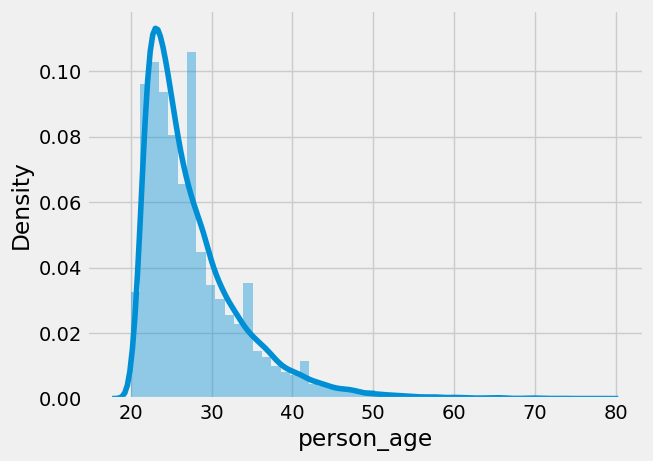

In [107]:
sns.distplot(df['person_age'])

<AxesSubplot:>

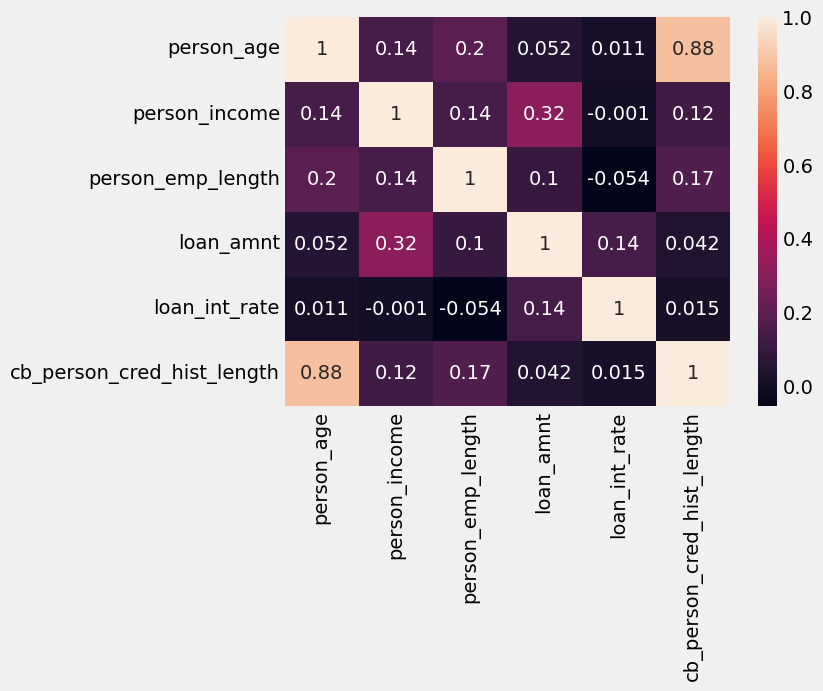

In [108]:
sns.heatmap(data=num_df.corr(),annot=True)

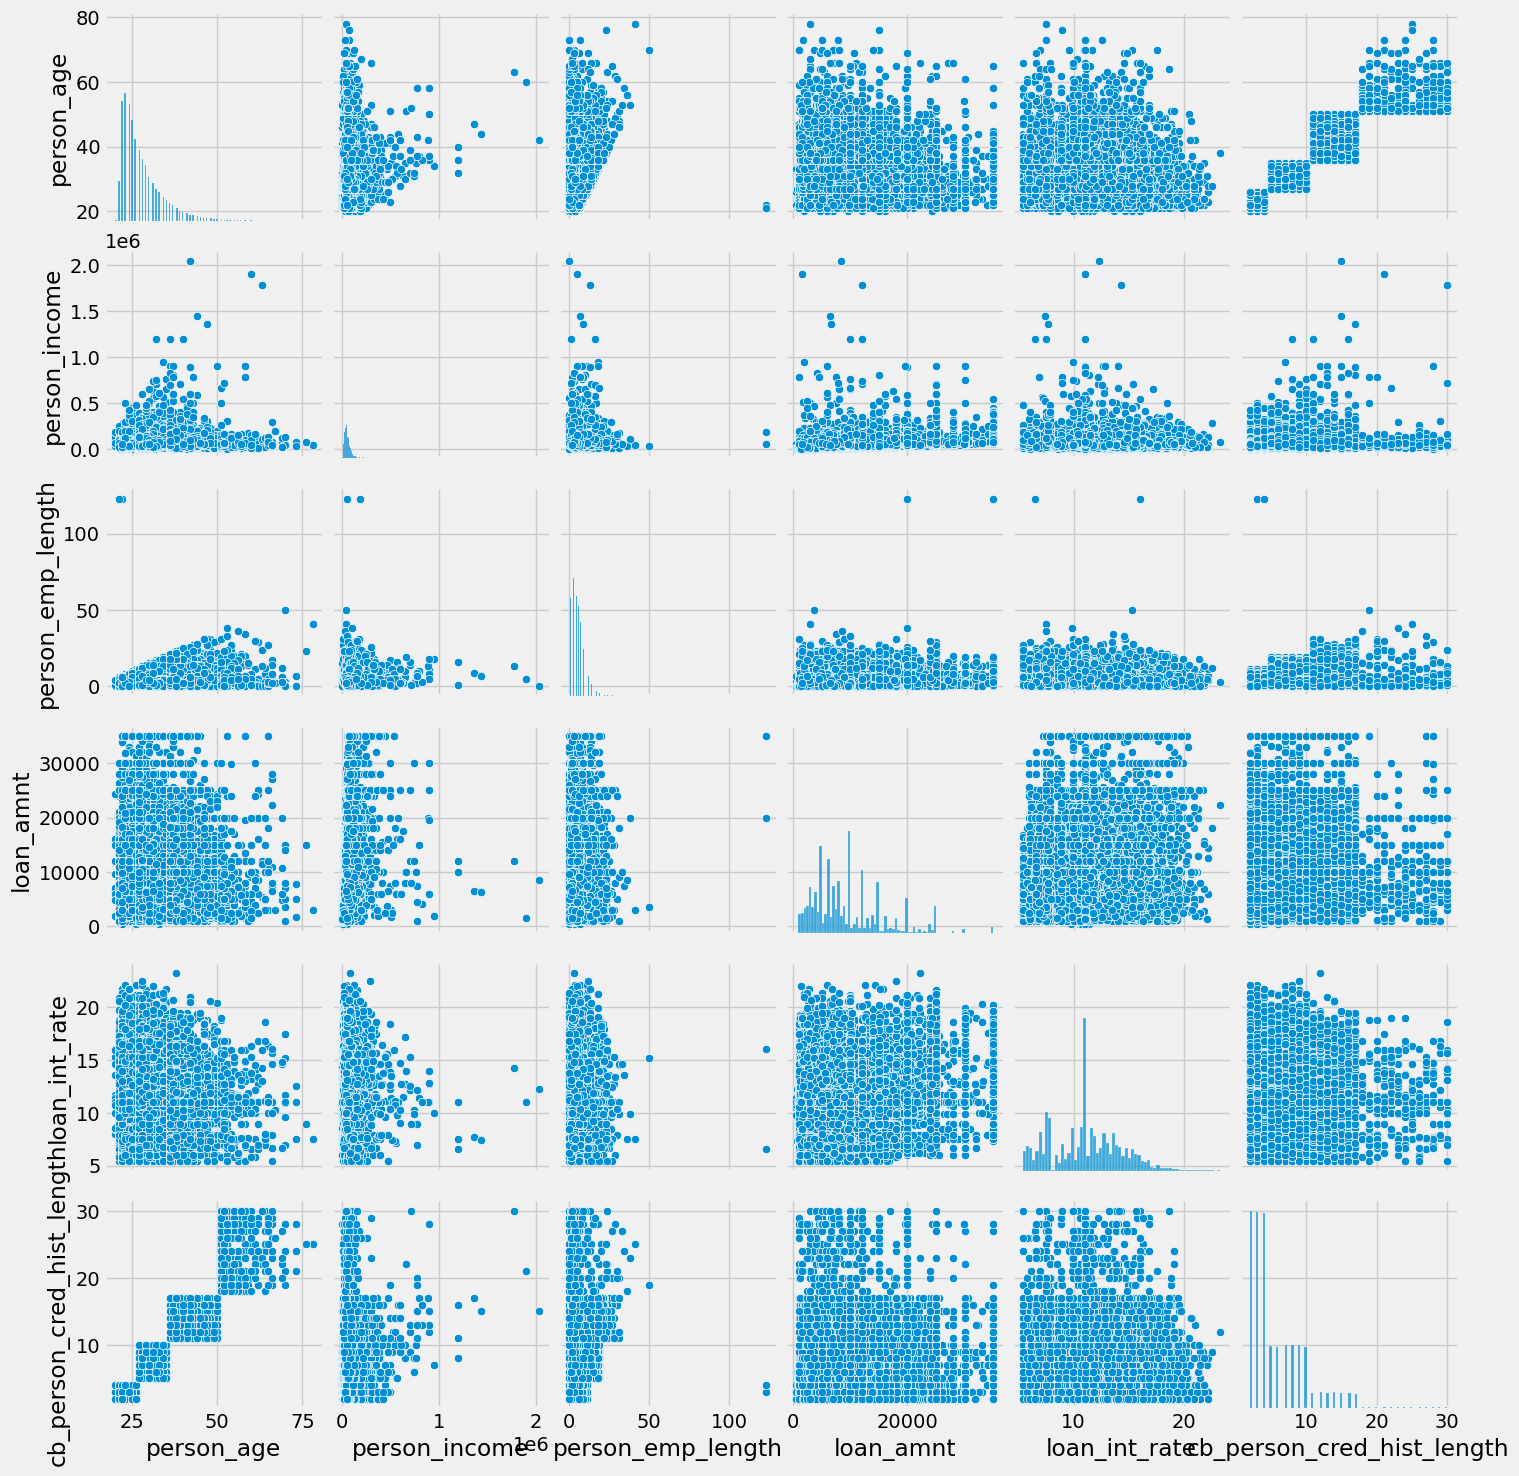

In [109]:
sns.pairplot(data=num_df)

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

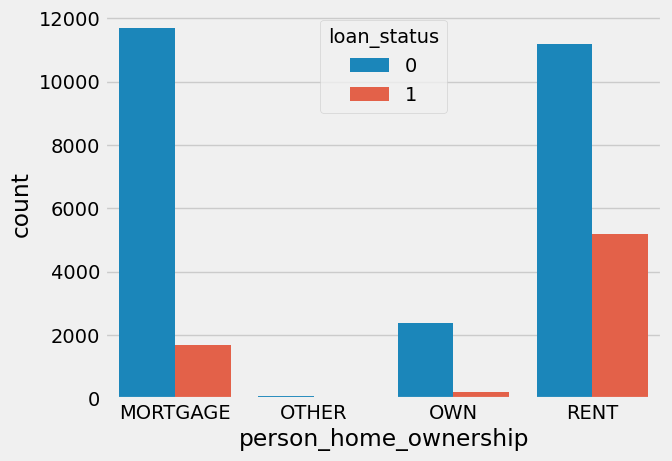

In [110]:
sns.countplot(data=df,x='person_home_ownership',hue='loan_status')

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

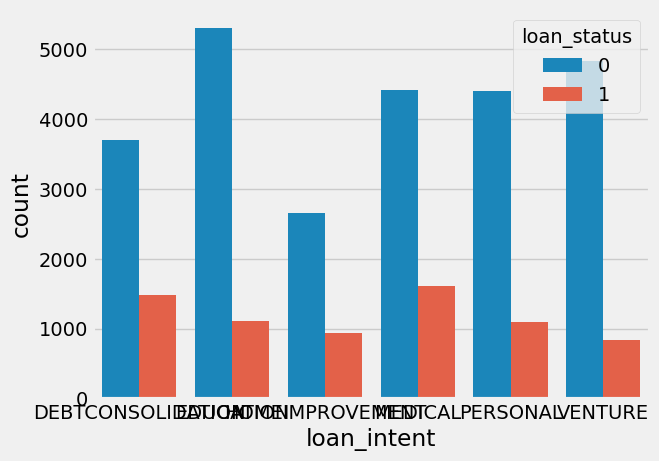

In [111]:
sns.countplot(data=df,x='loan_intent',hue='loan_status')

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

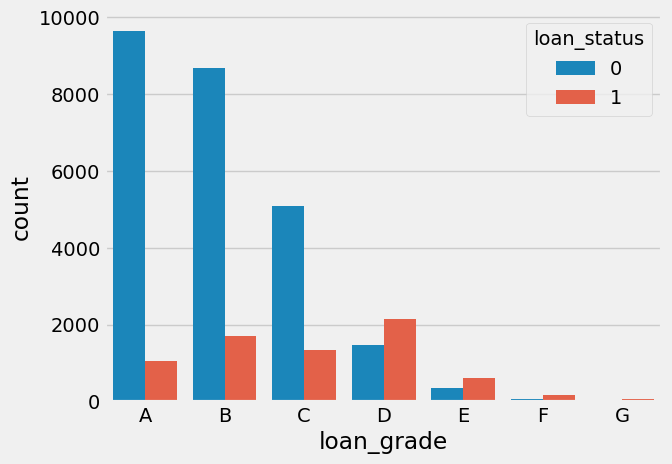

In [112]:
sns.countplot(data=df,x='loan_grade',hue='loan_status')

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

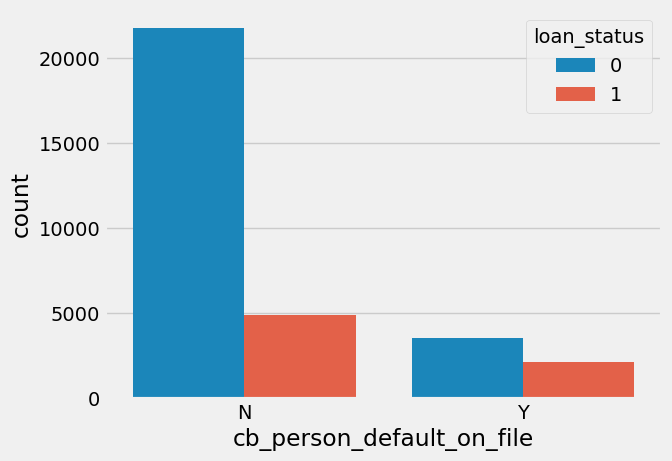

In [113]:
sns.countplot(data=df,x='cb_person_default_on_file',hue='loan_status')

In [114]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'loan_status',
 'cb_person_default_on_file']

## Handling the Outliers

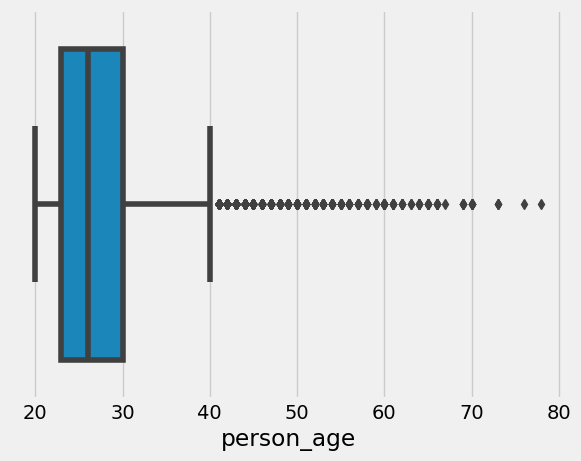

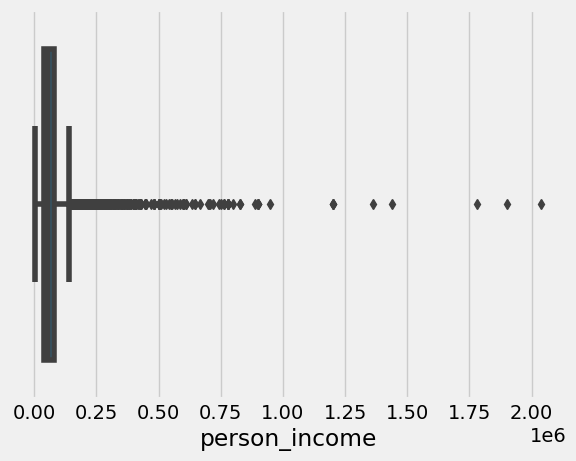

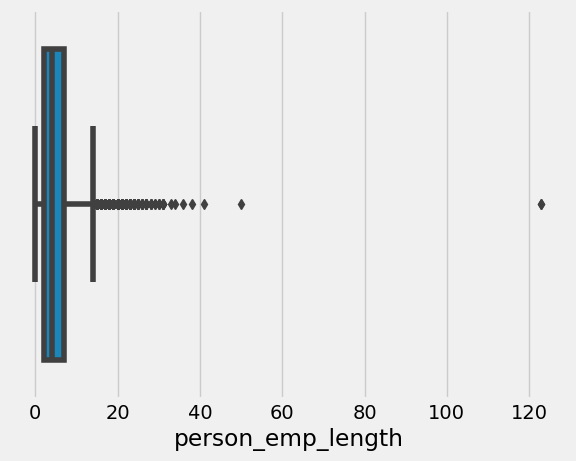

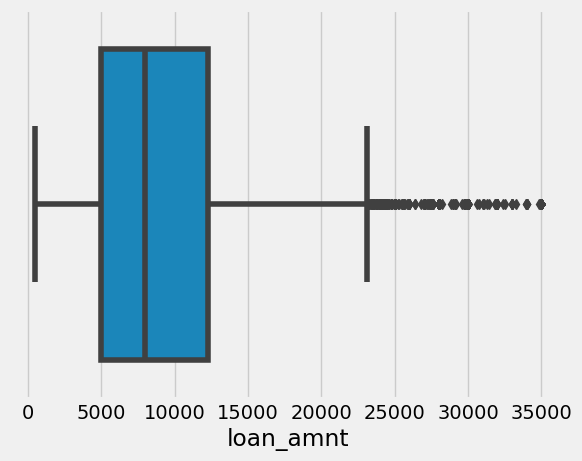

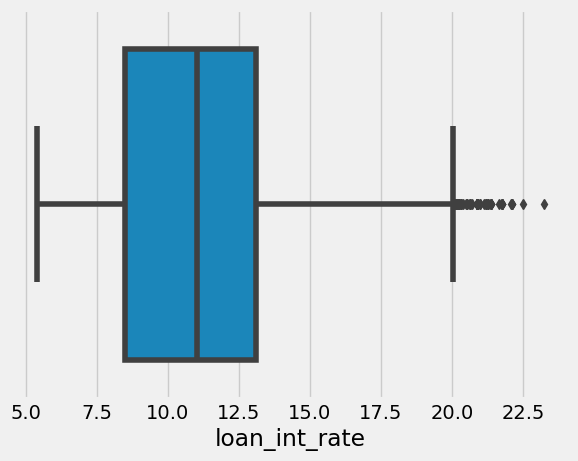

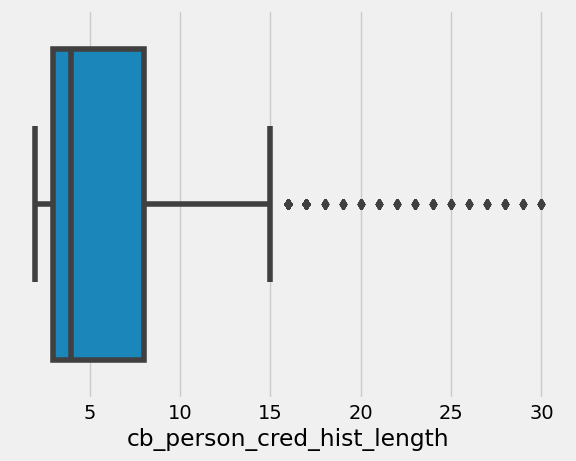

In [115]:
for i, col in enumerate(num_df.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=num_df)

In [116]:
df['person_emp_length']=df.loc[df['person_emp_length']>60,'person_emp_length']=4


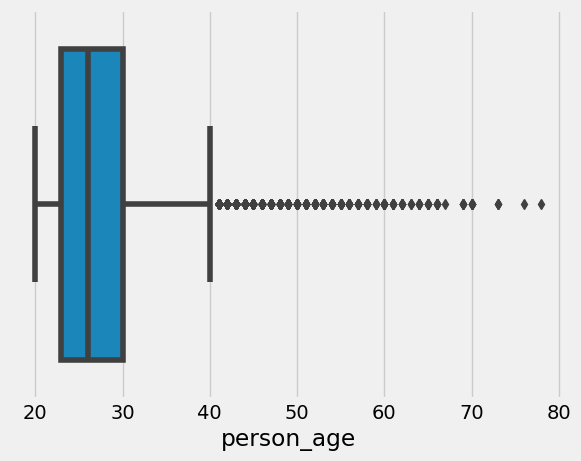

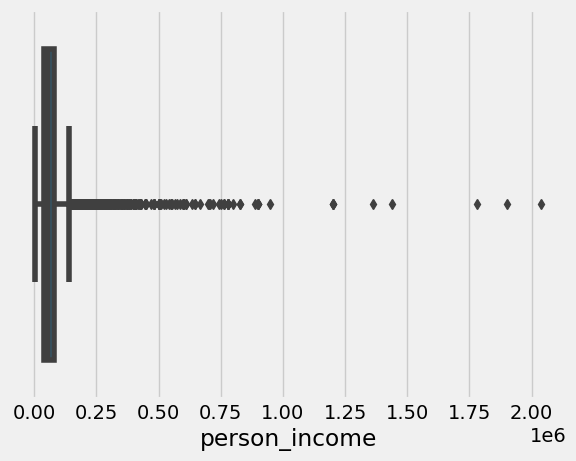

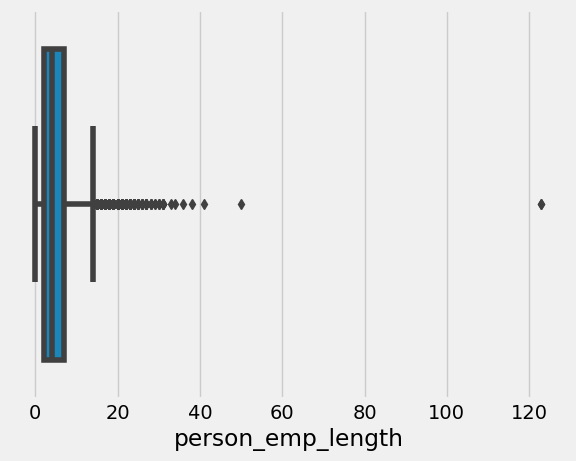

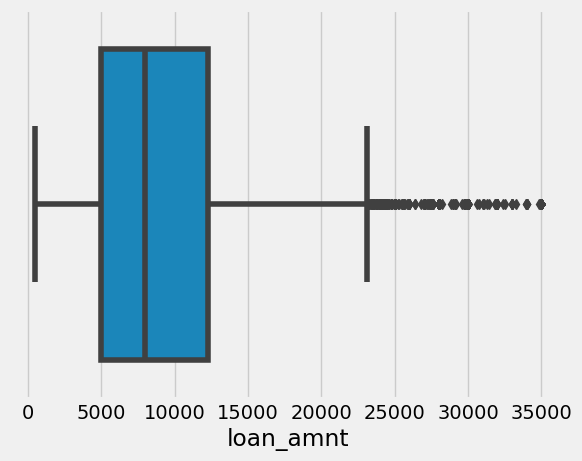

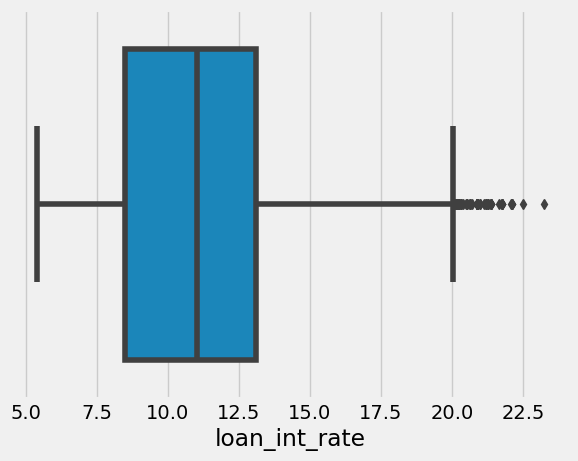

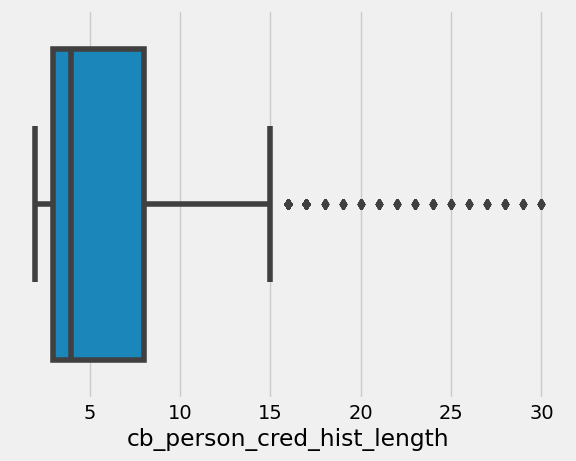

In [117]:
for i, col in enumerate(num_df.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=num_df)

In [118]:
def outlier_det(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    for i,num in enumerate(x):
        if (num < lower_limit):
            x.replace(num,lower_limit,inplace=True)
        elif (num > upper_limit):
            x.replace(num,upper_limit,inplace=True)
    return x

    
        

In [119]:
for i in num_df.columns:
    num_df[i]=outlier_det(num_df[i])
num_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000,32408.000000
mean,27.448701,62429.764533,4.756171,9418.304894,11.015381,5.711568
std,5.270804,31803.023255,3.800153,5828.400781,3.077521,3.712155
min,20.000000,4000.000000,0.000000,500.000000,5.420000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,11.017213,4.000000
75%,30.000000,79200.000000,7.000000,12250.000000,13.110000,8.000000
max,40.500000,140250.000000,14.500000,23125.000000,20.040000,15.500000


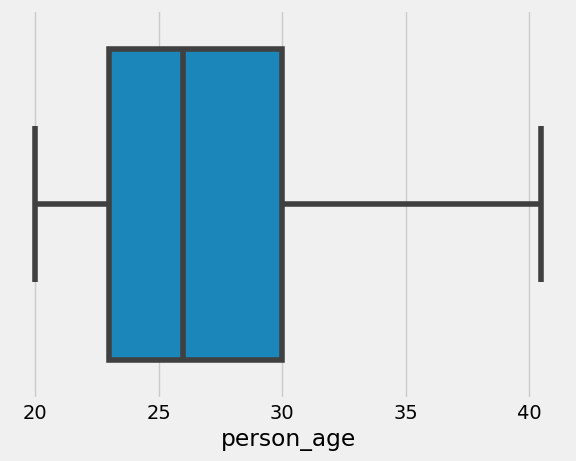

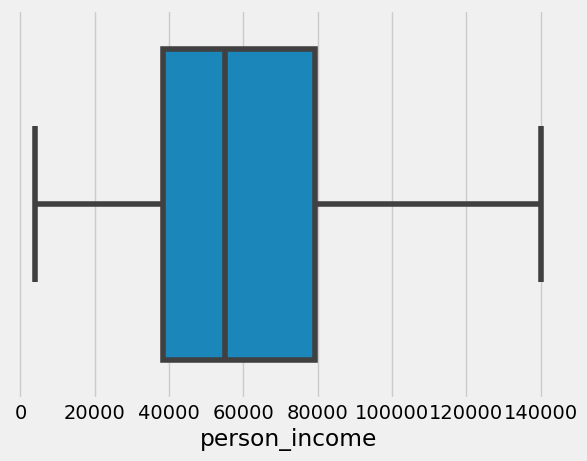

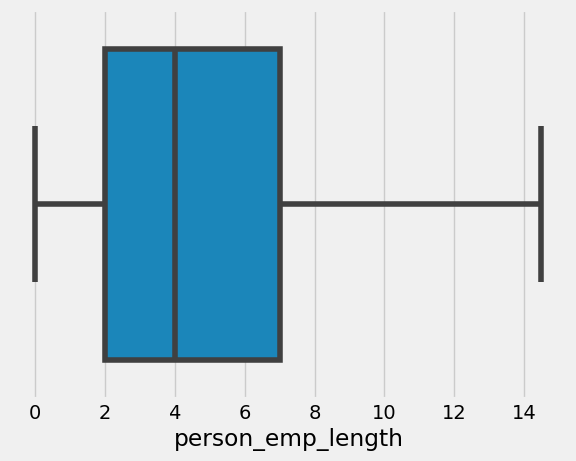

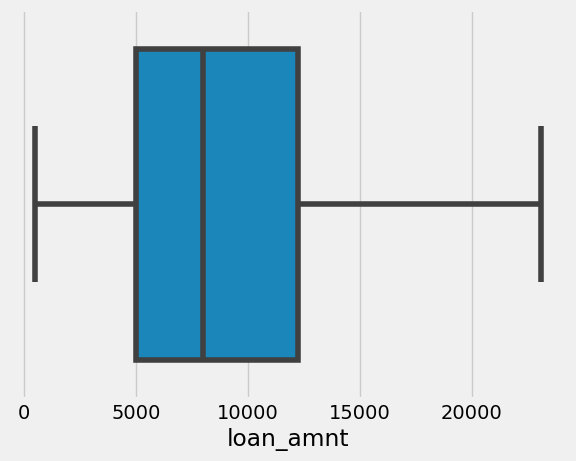

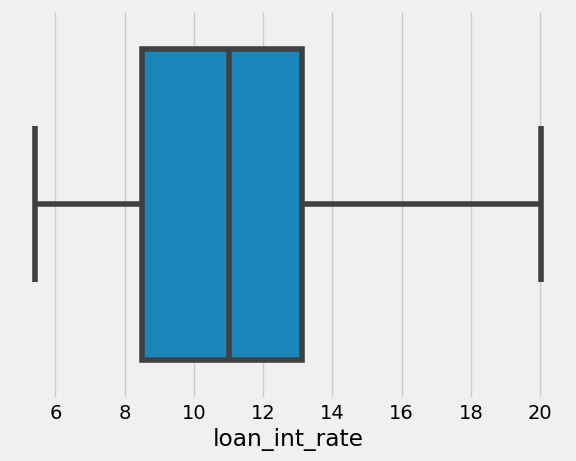

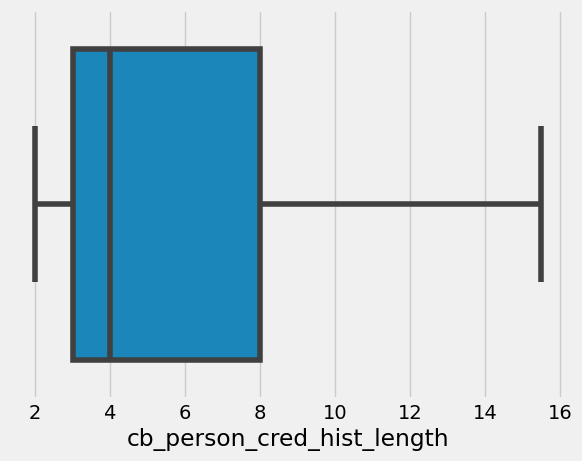

In [120]:
for i, col in enumerate(num_df.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=num_df)

## Dummy variable encoding of categorical values

In [121]:
cat_df=df[cat_cols]
cat_df.drop('loan_status',axis=1,inplace=True)

In [122]:
cat_df = pd.get_dummies(cat_df, prefix={'person_home_ownership':'person_home_ownership',
                                        'loan_intent':'loan_intent',
                                        'loan_grade':'loan_grade',
                                       'cb_person_default_on_file':'cb_person_default_on_file'},
                            drop_first=False)
cat_df.shape

(32408, 19)

In [123]:
#joining the dataframes on index
tot_df=num_df.join(cat_df)
tot_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22.0,59000,14.5,23125,16.02,3.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,21.0,9600,5.0,1000,11.14,2.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,25.0,9600,1.0,5500,12.87,3.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23.0,65500,4.0,23125,15.23,2.0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,24.0,54400,8.0,23125,14.27,4.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000,1.0,5800,13.16,15.5,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,40.5,120000,4.0,17625,7.49,15.5,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,40.5,76000,3.0,23125,10.99,15.5,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
32579,40.5,140250,5.0,15000,11.48,15.5,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(tot_df)
scaled_df=scaler.transform(tot_df)
X=scaled_df

In [125]:
y=df['loan_status']

## Model Building by Logistic Regression

In [126]:
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=10,test_size=0.3,stratify=y, shuffle=True)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_train)
y_pred2 = classifier.predict(X_test)
score1 =accuracy_score(y_train,y_pred1)
score2 =accuracy_score(y_test,y_pred2)
print("Accuracy on training data",score1)
print("Accuray on testing data",score2)

Accuracy on training data 0.8550584086400705
Accuray on testing data 0.8544687853543145


## Evaluation Of Model

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[7303  293]
 [1122 1005]]


In [129]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Recall :",recall_score(y_test,y_pred2))
print("Precision :",precision_score(y_test,y_pred2))
print("F1 Score :",f1_score(y_test,y_pred2))

Recall : 0.47249647390691113
Precision : 0.7742681047765794
F1 Score : 0.5868613138686132


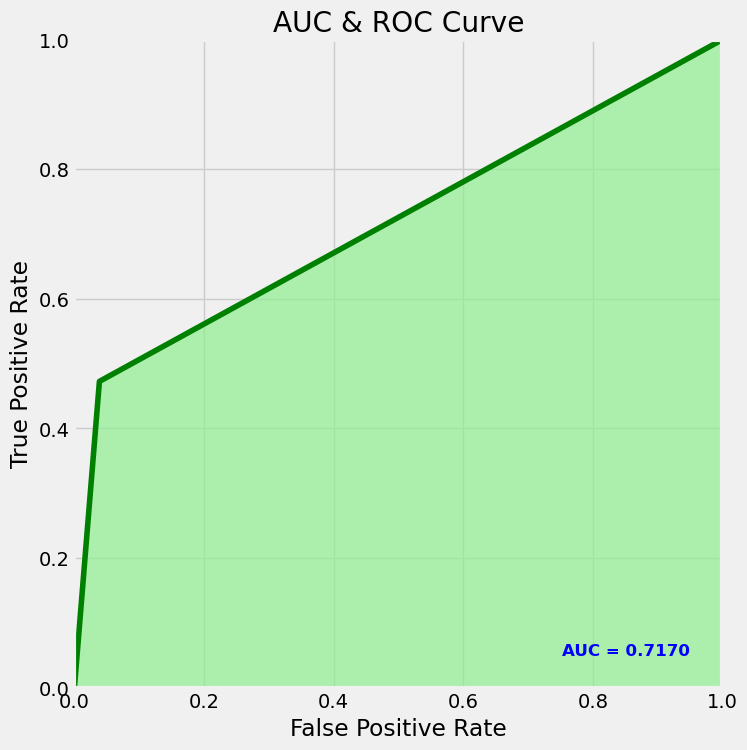

In [130]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [131]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score 
from sklearn.tree import plot_tree, export_text

In [132]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4,PERSONAL,D,35000,16.02,1,Y,3
1,21,9600,OWN,4,EDUCATION,B,1000,11.14,0,N,2
2,25,9600,MORTGAGE,4,MEDICAL,C,5500,12.87,1,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,N,2
4,24,54400,RENT,4,MEDICAL,C,35000,14.27,1,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,4,PERSONAL,C,5800,13.16,0,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,N,19
32578,65,76000,RENT,4,HOMEIMPROVEMENT,B,35000,10.99,1,N,28
32579,56,150000,MORTGAGE,4,PERSONAL,B,15000,11.48,0,N,26


# Decision Tree Classifier

In [133]:
model=tree.DecisionTreeClassifier(random_state=0)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32408 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32408 non-null  int64   
 1   person_income               32408 non-null  int64   
 2   person_home_ownership       32408 non-null  category
 3   person_emp_length           32408 non-null  int64   
 4   loan_intent                 32408 non-null  category
 5   loan_grade                  32408 non-null  category
 6   loan_amnt                   32408 non-null  int64   
 7   loan_int_rate               32408 non-null  float64 
 8   loan_status                 32408 non-null  category
 9   cb_person_default_on_file   32408 non-null  category
 10  cb_person_cred_hist_length  32408 non-null  int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 2.9 MB


In [135]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [136]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [137]:
cat_cols = X.select_dtypes(include='category').columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [138]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [139]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0,stratify =y) 

In [140]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [141]:
y_pred3 = model.predict(X_valid)

In [142]:
accuracy = accuracy_score(y_valid, y_pred3)
print('Accuracy:', accuracy)

Accuracy: 0.8703075182556824


In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred3)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[6929  667]
 [ 594 1533]]


In [144]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Recall :",recall_score(y_valid,y_pred3))
print("Precision :",precision_score(y_valid,y_pred3))
print("F1 Score :",f1_score(y_valid,y_pred3))

Recall : 0.7207334273624824
Precision : 0.6968181818181818
F1 Score : 0.7085740697943148


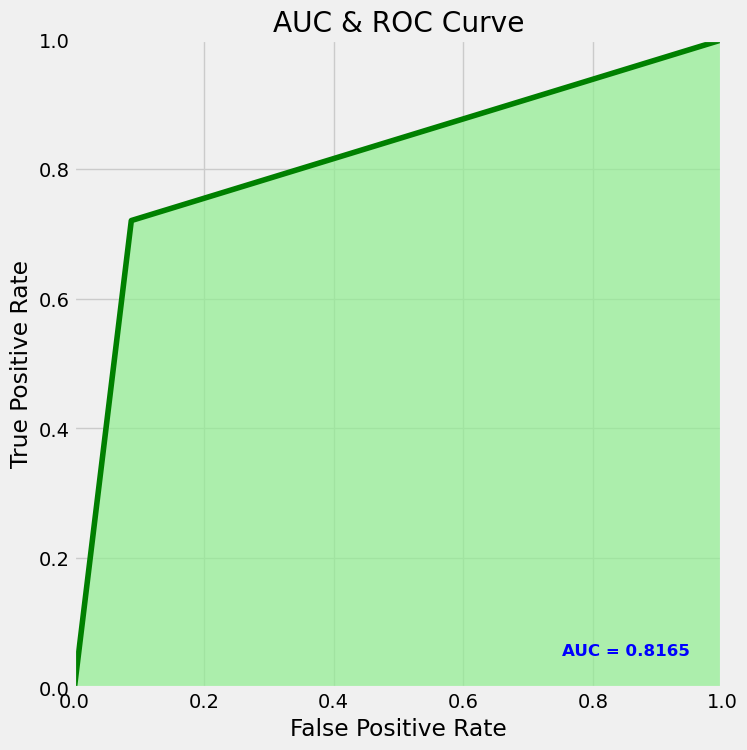

In [174]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_valid, y_pred3)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_valid, y_pred3)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Random Forest Classifier

In [161]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [162]:
y_pred=rf.predict(X_valid)

In [163]:
accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9159724364907951


In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[7420  176]
 [ 641 1486]]


In [165]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Recall :",recall_score(y_valid,y_pred))
print("Precision :",precision_score(y_valid,y_pred))
print("F1 Score :",f1_score(y_valid,y_pred))

Recall : 0.6986365773389751
Precision : 0.8941034897713598
F1 Score : 0.7843758247558723


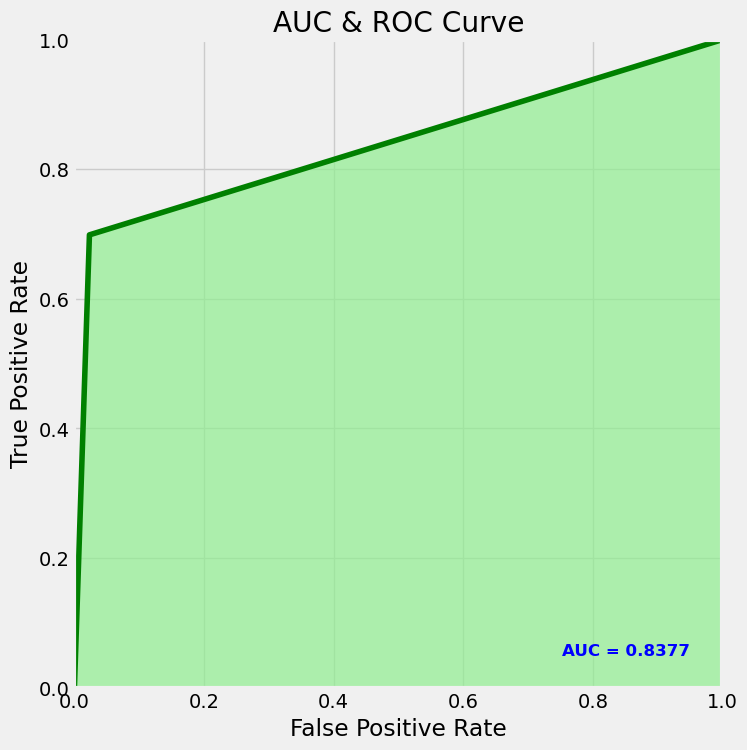

In [175]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_valid, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_valid, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Light GBM Classifier

In [145]:
!pip install lightgbm

In [146]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [147]:
# y_train=y_train.astype('int32')
# y_valid=y_valid.astype('int32')

In [151]:

# train LightGBM model
model = clf.fit(X_train,y_train)

# evaluate model on test data
y_pred4 = model.predict(X_valid)

In [152]:
accuracy = accuracy_score(y_valid, y_pred4)
print('Accuracy:', accuracy)

Accuracy: 0.9220405224724879


In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred4)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[7446  150]
 [ 608 1519]]


In [154]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Recall :",recall_score(y_valid,y_pred4))
print("Precision :",precision_score(y_valid,y_pred4))
print("F1 Score :",f1_score(y_valid,y_pred4))

Recall : 0.7141513869299483
Precision : 0.9101258238466148
F1 Score : 0.8003161222339304


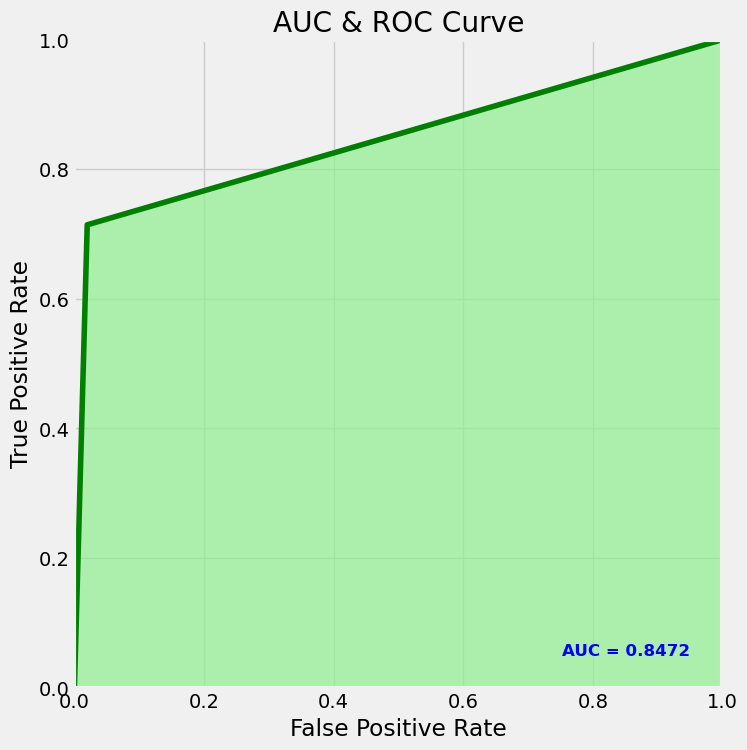

In [176]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_valid, y_pred4)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_valid, y_pred4)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Final depiction of the model results

In [169]:
dict1={'Accuarcy':[0.85,0.87,0.91,0.92],
        'Precision':[0.77,0.69,0.89,0.91],
    'Recall':[0.47,0.72,0.69,0.71]}

In [170]:
df=pd.DataFrame(dict1)

In [172]:
df.index=['Logistic','Decision_tree','Random_forest','Lightgbm']

In [173]:
df

,Accuarcy,Precision,Recall
Logistic,0.85,0.77,0.47
Decision_tree,0.87,0.69,0.72
Random_forest,0.91,0.89,0.69
Lightgbm,0.92,0.91,0.71
